# CSE:382 Data Mining and Business Intelligence

Prepared by:
Sohayla Ihab Hamed [19P7343]
Youssef Mahmoud Massoud [18P8814]
Salma Ihab Abdelmawgoud [19P8794]
Youssef Hany Onsy [18P1789]

Loan prediction is a common data mining problem which most retail banks solve on a 
daily basis. It’s the process of predicting who deserves to receive a given loan and at what 
rate based on certain characteristics of the borrower, be it an individual or a company. 
Those characteristics are mined for their use in a risk assessment process to determine 
the amount of risks the lender (the bank) will be incurring when loaning the particular 
individual/company. 

For example, some banks can model their interest rate for lending 
based on how much risk their model assumes a certain individual pose, and thereby 
require higher interest rates for those who pose higher risks of default and vice versa.
In our project, we use data mining techniques to analyze and predict whether a certain 
individual can be allowed to take a loan from our bank or whether said individual shall be 
denied the loan. This will be based on a set of features like marital status, education, 
employments and other features within the restrictions of the dataset we were provided. 
We will apply various data mining techniques to achieve our required goal where we end 
up with a classification model that we will train and later test.

By the end of this project, we should have a set of divided preprocessing techniques(explained here)
into functions and procedures, such that any real data may be handled

# LOAN PREDICTION

## DATA VISUALIZATION

In [15]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
TrainData = pd.read_csv("Train Data.csv", delimiter = ',', header = 0, index_col = 0)
#print(TrainData)

In [17]:
# showing the univariant statistics for numerical variables
TrainData.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [18]:
TrainData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


In [19]:
TrainData.mode()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,0,Graduate,No,2500,0.0,120.0,360.0,1.0,Semiurban,Y


In [20]:
# showing the bivariant statistics between each variable with the Loan Status(Yes or No)
TrainData.groupby("Loan_Status").describe()

ApplicantIncome                                                   \
                      count         mean          std    min     25%     50%   
Loan_Status                                                                    
N                     192.0  5446.078125  6819.558528  150.0  2885.0  3833.5   
Y                     422.0  5384.068720  5765.441615  210.0  2877.5  3812.5   

                              CoapplicantIncome               ...  \
                 75%      max             count         mean  ...   
Loan_Status                                                   ...   
N            5861.25  81000.0             192.0  1877.807292  ...   
Y            5771.50  63337.0             422.0  1504.516398  ...   

            Loan_Amount_Term        Credit_History                           \
                         75%    max          count      mean       std  min   
Loan_Status                                                                   
N                      360.0  480.0          179.0  0.541899  0.499639  0.0   
Y                      360.0  480.0          385.0  0.981818  0.133782  0.0   

                                 
             25%  50%  75%  max  
Loan_Status                      
N            0.0  1.0  1.0  1.0  
Y            1.0  1.0  1.0  1.0  

[2 rows x 40 columns]

In [21]:
print("kurtosis: ")
TrainData.kurtosis(numeric_only=True)

kurtosis: 


ApplicantIncome      60.540676
CoapplicantIncome    84.956384
LoanAmount           10.401533
Loan_Amount_Term      6.673474
Credit_History        1.548763
dtype: float64

In [22]:
print("skew: ")
TrainData.skew(numeric_only=True)

skew: 


ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

In [23]:
#Notes!! Conclusions to KEEP IN MIND: 
# CoapplicantIncome: 25% is $0. Later, remove tuples where CoapplicantIncome=0 and analyze on its own.
# Loan_Amount_term: Q1, Q2, Q3 = 360. Which means the data is skewed towards their favor. (360 months loan)
# STD is pretty high for ApplicantIncome=6109 and CoapplicantIncome=2926
# Credit_History: Q1, Q2, Q3 = 1. Which means that most people have credit history.
# Note: very important to treat loan term and credit history as categorical, not numerical, since its values are discrete

# skewness determines asymmetrical distribution
# · -0.5 < skewness < 0.5, the data are fairly symmetrical
# ·  -1 < skewness < — 0.5 or  0.5 < skewness < 1, the data are moderately skewed
# · skewness < -1 or skewness > 1, the data are highly skewed

# kurtosis determine the volume of the outlier
# · If the distribution is tall and thin it is called a leptokurtic distribution(Kurtosis > 3). Values in a leptokurtic distribution are near the mean or at the extremes.
# · A flat distribution where the values are moderately spread out (i.e., unlike leptokurtic) is called platykurtic(Kurtosis <3) distribution.
# · A distribution whose shape is in between a leptokurtic distribution and a platykurtic distribution is called a mesokurtic(Kurtosis=3) distribution. A mesokurtic distribution looks more close to a normal distribution.
# source: https://medium.com/@atanudan/kurtosis-skew-function-in-pandas-aa63d72e20de

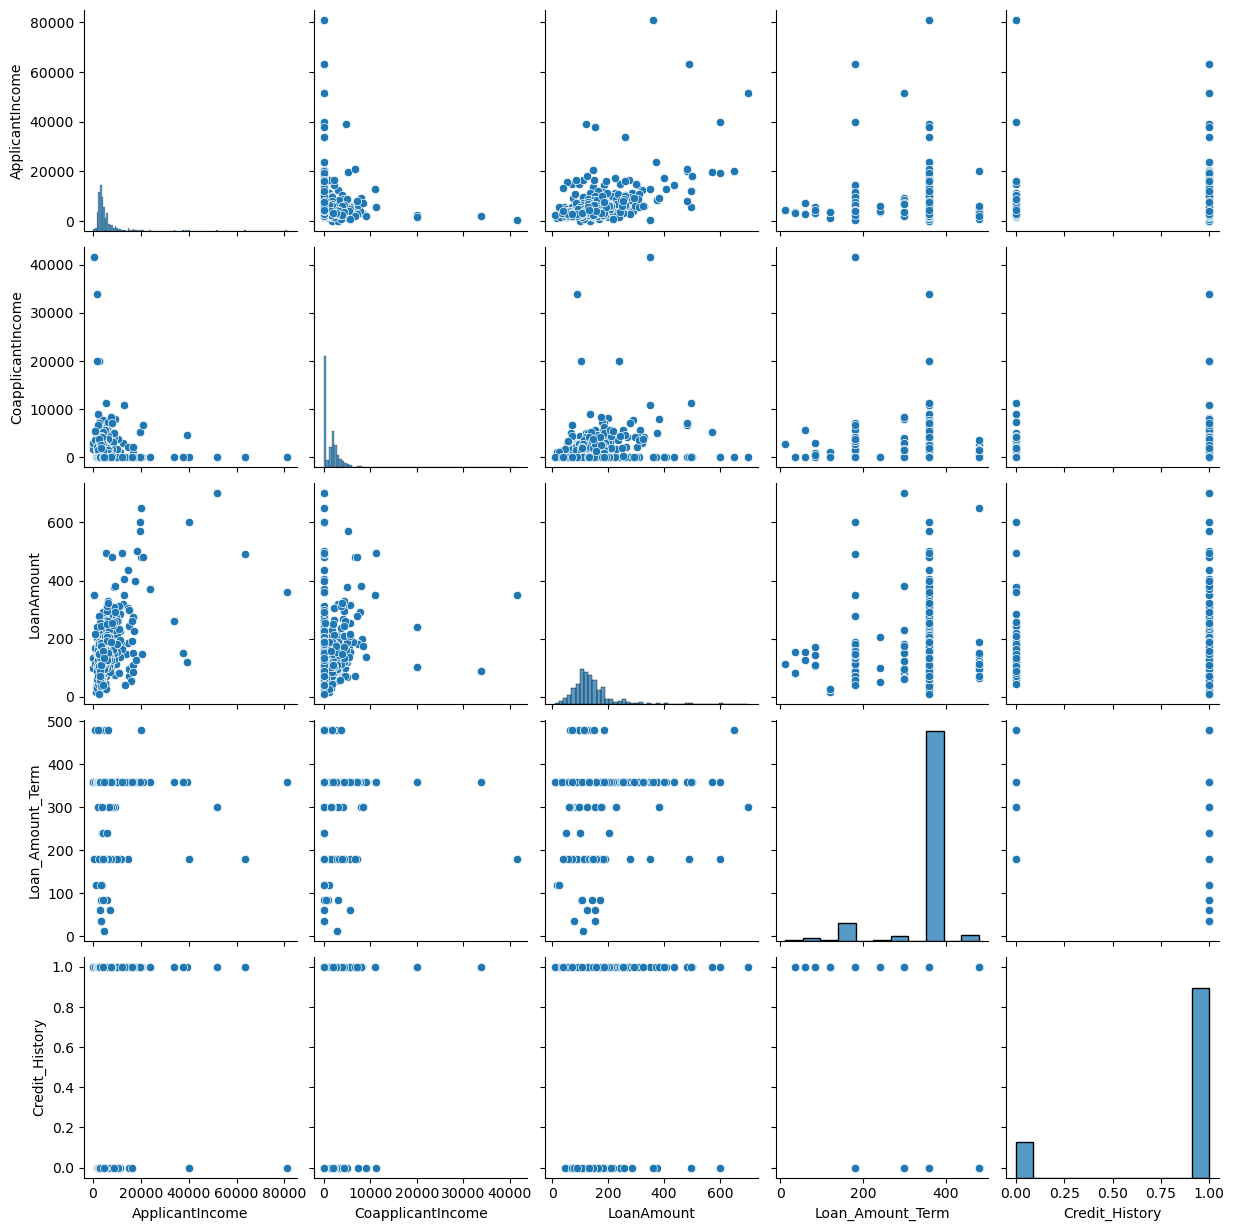

In [47]:
#Visualizing Numerical Features
NumericData = TrainData.select_dtypes(exclude = ['object']).columns.tolist()
TrainData_n = TrainData[NumericData]
#print("Description of Numerical Features:", TrainData.describe()) 


# seaborn histograms (univariate and pairwise)
# TODO tweak this so it looks better. try other things like scatter, density, histo, etc
# TODO please look up how to visualize correlation with the TARGET
# "Numerical features can be visualized by plotting their distribution and having a look at their statistical properties, 
# such as skewness and kurtosis. For categorical features, the distribution is better visualized using histograms. 
# Finally, you can calculate and visualize the correlation between the features and also the features with the target value."
# source: https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0
# tutorial (ref doc): https://seaborn.pydata.org/tutorial/distributions.html
# TODO please examine the correlation matrix results at the end of the notebook, 
# and draw a relational plot with the three most correlated values
# tutorial: https://seaborn.pydata.org/tutorial/relational.html#relational-tutorial
# Important note: this is a very general API. You can adjust more specifically by using jointplot, scatterplot etc.
sns.pairplot(TrainData)

plt.show()

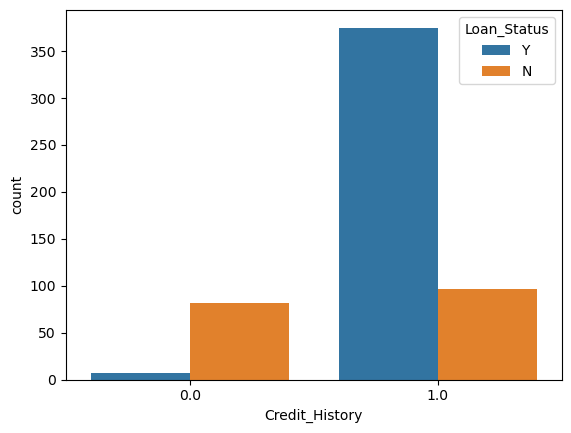

In [48]:
#Visualizing Categorical Features
#TODO use countplot to visualize univariate categorical
sns.countplot(data=TrainData,
    x="Credit_History",
    hue="Loan_Status")
plt.show()

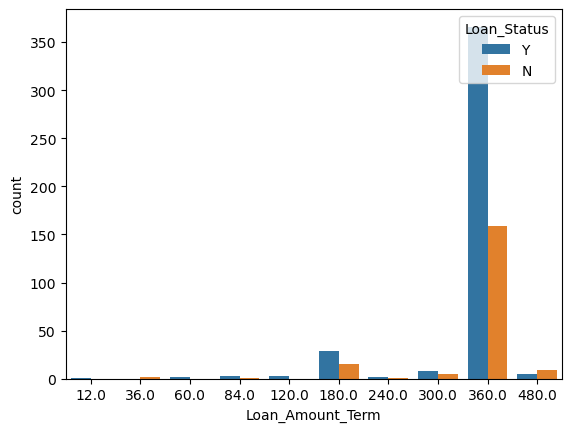

In [49]:
sns.countplot(data=TrainData,
    x="Loan_Amount_Term",
    hue="Loan_Status")
plt.show()

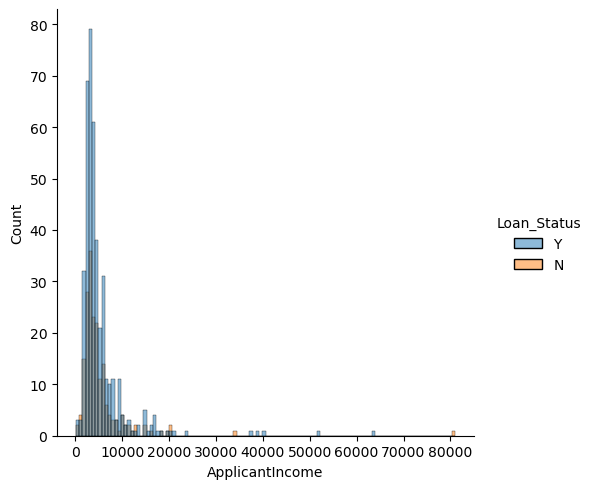

In [50]:
sns.displot(data=TrainData,
    x="ApplicantIncome", #y='ApplicantIncome',
    hue="Loan_Status")
plt.show()

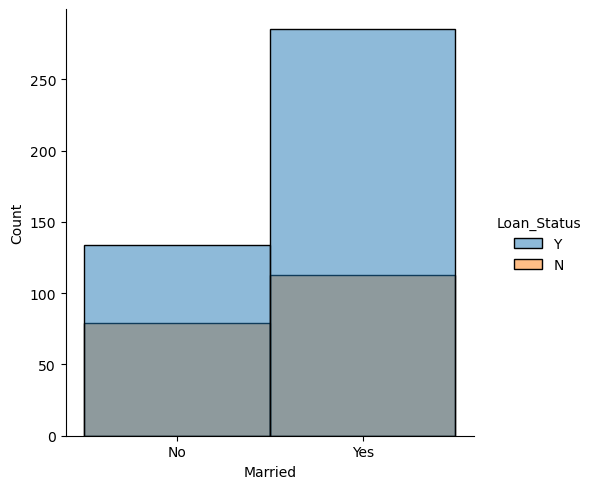

In [55]:
sns.displot(
    data=TrainData, #kind ="count",
    x="Married" , hue="Loan_Status"#, element="step"
)
plt.show()

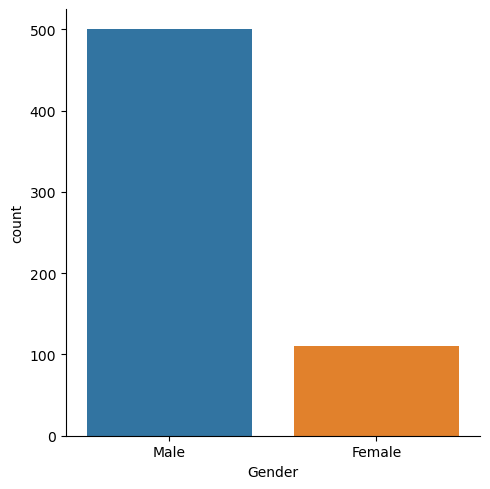

In [56]:
sns.catplot(
    data=TrainData, kind ="count",
    x="Gender" 
)
plt.show()

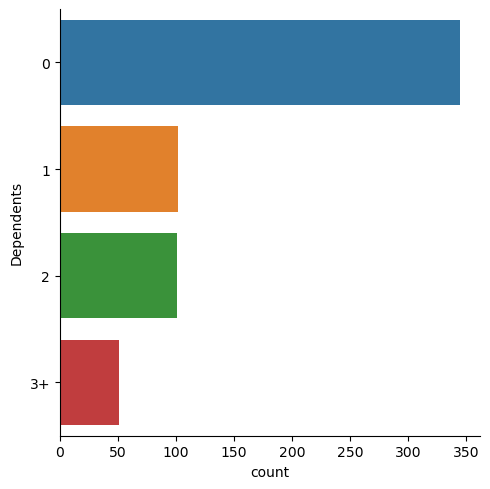

In [57]:
sns.catplot(
    data=TrainData, kind ="count",
    y="Dependents", #hue="Loan_Status"#, palette="ch:.25" 
)
plt.show()

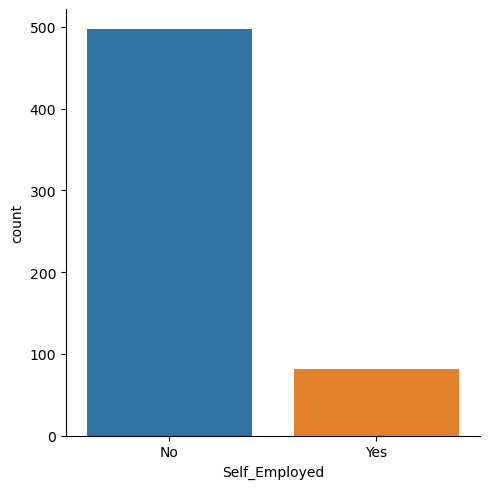

In [58]:
sns.catplot(
    data=TrainData, kind ="count",
    x="Self_Employed"
)
plt.show()

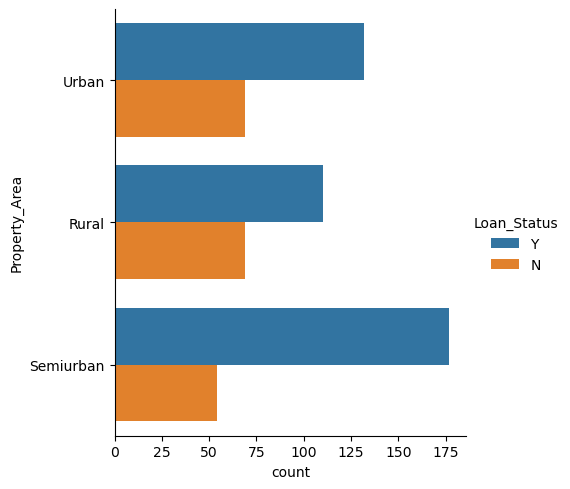

In [59]:
sns.catplot(
    data=TrainData, kind ="count",
    y="Property_Area", hue="Loan_Status"#, palette="ch:.25" 
)
plt.show()

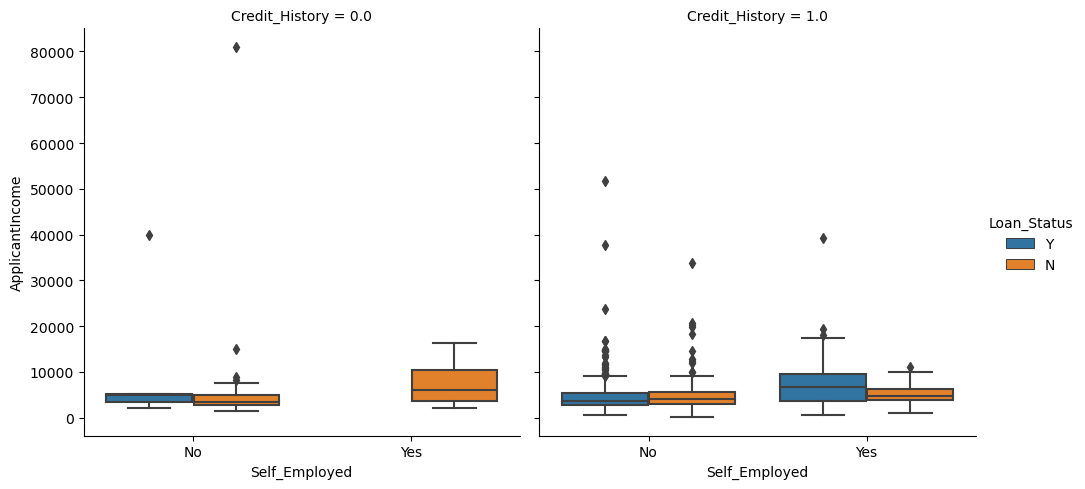

In [60]:
sns.catplot(
    data=TrainData, kind ="box", y="ApplicantIncome",
    x="Self_Employed", hue="Loan_Status", col="Credit_History"#, palette="ch:.25" 
)
plt.show()

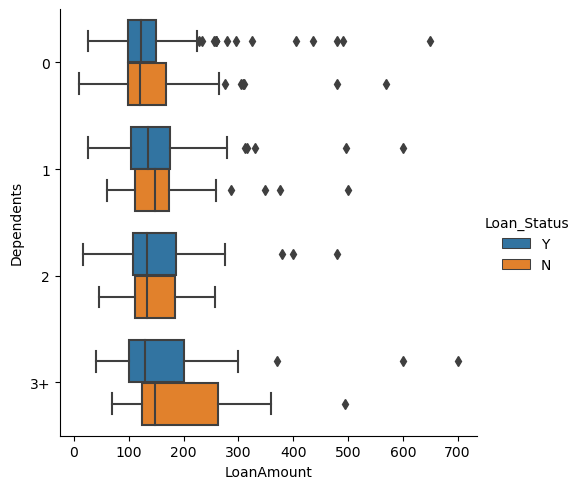

In [61]:
#catplot is used
sns.catplot(
    data=TrainData, kind ="box",
    x="LoanAmount", y="Dependents", 
    hue="Loan_Status" 
)
plt.show()
# When categories are harder to define, we will use binning methods.
# Scroll below to binning.

## DATA CLEANING

### Handle Missing Data

Identify missing data of both types, numerical and categorical data

In [62]:
NumericData = TrainData.select_dtypes(exclude = ['object']).columns.tolist()
TrainData_n = TrainData[NumericData]
#print(TrainData_n, '\n')

CategoricData = TrainData.select_dtypes(include = ['object']).columns.tolist()
TrainData_c = TrainData[CategoricData]
#print(TrainData_c, '\n')

In [63]:
# Drop duplicates
print(TrainData.shape)
TrainData.drop_duplicates(inplace=True)
print(TrainData.shape)

(611, 12)
(611, 12)


In [64]:
# Now, we try to figure out what kind of missing values are there. 
# “0”, “Not Applicable”, “NA”, “None”, “Null”, or “INF” all can mean that the value is missing.
for feature in TrainData.columns:
    res = list(set(TrainData[feature]))
    print(res)

# Therefore, all missing values are np.nan or None

['Male', 'Female']
['Yes', 'No']
['2', nan, '3+', '1', '0']
['Not Graduate', 'Graduate']
[nan, 'Yes', 'No']
[4100, 2058, 4106, 2060, 2071, 4124, 2083, 4133, 4160, 4166, 4167, 6216, 2130, 2132, 4180, 2137, 2138, 4188, 4191, 2149, 4200, 6250, 8300, 6256, 2165, 2167, 4226, 2178, 6277, 4230, 6283, 8333, 8334, 16525, 2192, 150, 2213, 2214, 10408, 2221, 10416, 6325, 4281, 4283, 20667, 2237, 6333, 2239, 4288, 4300, 2253, 4301, 210, 12500, 4310, 2275, 2281, 39147, 4333, 6383, 4342, 14583, 4344, 2297, 2301, 4350, 6400, 4354, 2309, 6406, 10513, 6417, 2330, 16667, 16666, 2333, 4384, 2346, 4400, 16692, 4408, 2366, 4416, 2378, 2383, 2395, 14683, 2400, 20833, 6500, 4467, 8566, 2423, 2425, 2435, 2439, 6540, 2454, 416, 2473, 2479, 8624, 2483, 2484, 2491, 2492, 2499, 2500, 4547, 4554, 2507, 2510, 6608, 4566, 8666, 2526, 4583, 6633, 2550, 4600, 10750, 4606, 4608, 4616, 2577, 14866, 4625, 2583, 14880, 2600, 12841, 4652, 6700, 8750, 2609, 51763, 4666, 2620, 2625, 4680, 4683, 12876, 10833, 4691, 4692, 2645

In [65]:
# First Approach: removing tuples. We remove tuples only if the dataset is large enough, and the tuple has multiple missing values.
# Complete Case Analysis(CCA) may be used if data is MAR (Missing At Random)

print(TrainData.isnull().sum()) #returns np.na or None
print(TrainData.shape)
TrainData_nonull = TrainData.dropna(inplace=False)
print(TrainData_nonull.shape)

# Credit_History is the feature with the most missing tuples, but 50/641 is not significant enough to discard the feature entirely.
# 480/641 tuples remain. That's only around 78.18% of data. 
# Around 21.8% of data tuples have missing values. This may not be the best approach. Once the classification models are completed, 
# we can test using both datasets and evaluate their accuracy.

Gender                0
Married               0
Dependents           12
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
(611, 12)
(523, 12)


In [66]:
# Second Approach: Using conclusions from data visualization section, decide for each feature how to fill the missing values.
# Gender: most_frequent (male), since there is a huge variance between the two.
# Married: we can drop the 3 tuples, knowing, their effect over 614 tuples is not significant anyway.
# Dependents: knn
# Self-Employed: knn
# LoanAmount: (normally distributed variable, since mean=342, median=360, mode=360) impute with mean
# Loan_Amount_Term: impute with median
# Credit_History: knn



#TODO later, we can fill the missing values using a regression model. (if we have time, research)



# Note: In regards to imputing missing data: "Mean is most useful when the original data is not skewed, 
# while the median is more robust, not sensitive to outliers, and thus used when data is skewed.
# "It is worth mentioning that linear regression models are sensitive to outliers.
# "𝑘 nearest neighbour imputation, which classifies similar records and put them together, can also be utilized. 
# A missing value is then filled out by finding first the 𝑘 records closest to the record with missing values. 
# Next, a value is chosen from (or computed out of) the 𝑘 nearest neighbours."
# source: https://towardsdatascience.com/the-ultimate-guide-to-data-cleaning-3969843991d4
# "One thing to note here is that the KNN Imputer does not recognize text data values." We must discretize categorical features first.
# "Another critical point here is that the KNN Imptuer is a distance-based imputation method and it requires us to normalize our data. 
# Otherwise, the different scales of our data will lead the KNN Imputer to generate biased replacements for the missing values."
# source: https://medium.com/@kyawsawhtoon/a-guide-to-knn-imputation-95e2dc496e
# very IMPORTANT read, for later phases, on how to structure our preprocessing + predictors: (STACKING)
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_stack_predictors.html#sphx-glr-auto-examples-ensemble-plot-stack-predictors-py

In [67]:
MostFreqImputer = SimpleImputer(missing_values = np.NaN , strategy = 'most_frequent') #cat and num
MeanImputer = SimpleImputer(missing_values = np.NaN , strategy = 'mean') #num
MedianImputer = SimpleImputer(missing_values = np.NaN , strategy = 'median') #num
#MedianCatImputer = SimpleImputer(missing_values = np.NaN , strategy = 'constant', fill_value="calc median for feature x") #cat

In [68]:
# For Gender: mode
TrainData_Gender = np.array(TrainData['Gender']).reshape(-1, 1)
MostFreqImputer.fit(TrainData_Gender)
TrainData_Gender = MostFreqImputer.transform(TrainData_Gender)
TrainData_Gender = TrainData_Gender.flatten()
TrainData['Gender'] = TrainData_Gender

In [69]:
# For LoanAmount: mean
TrainData_LoanA = np.array(TrainData['LoanAmount']).reshape(-1, 1)
MeanImputer.fit(TrainData_LoanA)
TrainData_LoanA = MeanImputer.transform(TrainData_LoanA)
TrainData_LoanA = TrainData_LoanA.flatten()
#print(TrainData_LoanA.shape)

TrainData['LoanAmount'] = TrainData_LoanA

In [70]:
# For Loan_Amount_Term: median
TrainData_LoanT = np.array(TrainData['Loan_Amount_Term']).reshape(-1, 1)
MedianImputer.fit(TrainData_LoanT)
TrainData_LoanT = MedianImputer.transform(TrainData_LoanT)
TrainData_LoanT = TrainData_LoanT.flatten()
print(TrainData_LoanT.shape)
TrainData['Loan_Amount_Term'] = TrainData_LoanT

(611,)


In [71]:
# For Married: drop

import math

TrainData_Married = TrainData.copy()
print(TrainData_Married.isnull().sum())
print(TrainData_Married.shape)

TrainData_Married = TrainData_Married.drop(index=[row for row in TrainData_Married.index 
                                                  if pd.isna(TrainData_Married.loc[row, 'Married'])])

print(TrainData_Married.isnull().sum())
print(TrainData_Married.shape)

TrainData = TrainData_Married.copy()

Gender                0
Married               0
Dependents           12
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
(611, 12)
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
(611, 12)


KNNImputer to impute Dependents, Self_Employed, and Credit_History

Step 1) LabelEncoder

In [72]:
# Dependents: knn
# Self-Employed: knn
# Credit_History: knn


# KNN (after discretization and normalization as discussed in the comments)

# To find KNN between gender and loan_status, first use encoding to convert all categoric data into numeric data
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
genderlabels = label_encoder.fit_transform(TrainData['Gender'])
dependentslabels = label_encoder.fit_transform(TrainData['Dependents'])
selfemployedlabels = label_encoder.fit_transform(TrainData['Self_Employed'])
credithistorylabels = label_encoder.fit_transform(TrainData['Credit_History'])
marriedlabels = label_encoder.fit_transform(TrainData['Married'])
educationlabels = label_encoder.fit_transform(TrainData['Education'])
propertylabels = label_encoder.fit_transform(TrainData['Property_Area'])
loanstatuslabels = label_encoder.fit_transform(TrainData['Loan_Status'])


unique = np.unique(genderlabels)
print("Gender labels: ", unique)
print(list(set(TrainData['Gender'])))

unique = np.unique(dependentslabels)
print("Dependents labels: ", unique)
print(list(set(TrainData['Dependents'])))

unique = np.unique(selfemployedlabels)
print("Self_Employed labels: ", unique)
print(list(set(TrainData['Self_Employed'])))

unique = np.unique(credithistorylabels)
print("Credit_History labels: ", unique)
print(list(set(TrainData['Credit_History'])))

unique = np.unique(marriedlabels)
print("Married labels: ", unique)
print(list(set(TrainData['Married'])))

unique = np.unique(educationlabels)
print("Education labels: ", unique)
print(list(set(TrainData['Education'])))

unique = np.unique(propertylabels)
print("Property_Area labels: ", unique)
print(list(set(TrainData['Property_Area'])))

unique = np.unique(loanstatuslabels)
print("Loan_Status labels: ", unique)
print(list(set(TrainData['Loan_Status'])))


#Add to numeric table
TrainData_encoded = TrainData.copy()
TrainData_encoded['Gender'] = genderlabels  
TrainData_encoded['Dependents'] = dependentslabels  
TrainData_encoded['Self_Employed'] = selfemployedlabels  
TrainData_encoded['Credit_History'] = credithistorylabels  
TrainData_encoded['Married'] = marriedlabels  
TrainData_encoded['Education'] = educationlabels  
TrainData_encoded['Property_Area'] = propertylabels  
TrainData_encoded['Loan_Status'] = loanstatuslabels  



TrainData_encoded

Gender labels:  [0 1]
['Male', 'Female']
Dependents labels:  [0 1 2 3 4]
['2', nan, '3+', '1', '0']
Self_Employed labels:  [0 1 2]
[nan, 'Yes', 'No']
Credit_History labels:  [0 1 2]
[0.0, 1.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
Married labels:  [0 1]
['Yes', 'No']
Education labels:  [0 1]
['Not Graduate', 'Graduate']
Property_Area labels:  [0 1 2]
['Rural', 'Semiurban', 'Urban']
Loan_Status labels:  [0 1]
['Y', 'N']


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1,2,1
LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1,0,0
LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1,2,1
LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1,2,1
LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,0,0,0,0,0,2900,0.0,71.000000,360.0,1,0,1
LP002979,1,1,3,0,0,4106,0.0,40.000000,180.0,1,0,1
LP002983,1,1,1,0,0,8072,240.0,253.000000,360.0,1,2,1


Step 2) MinMaxScaler

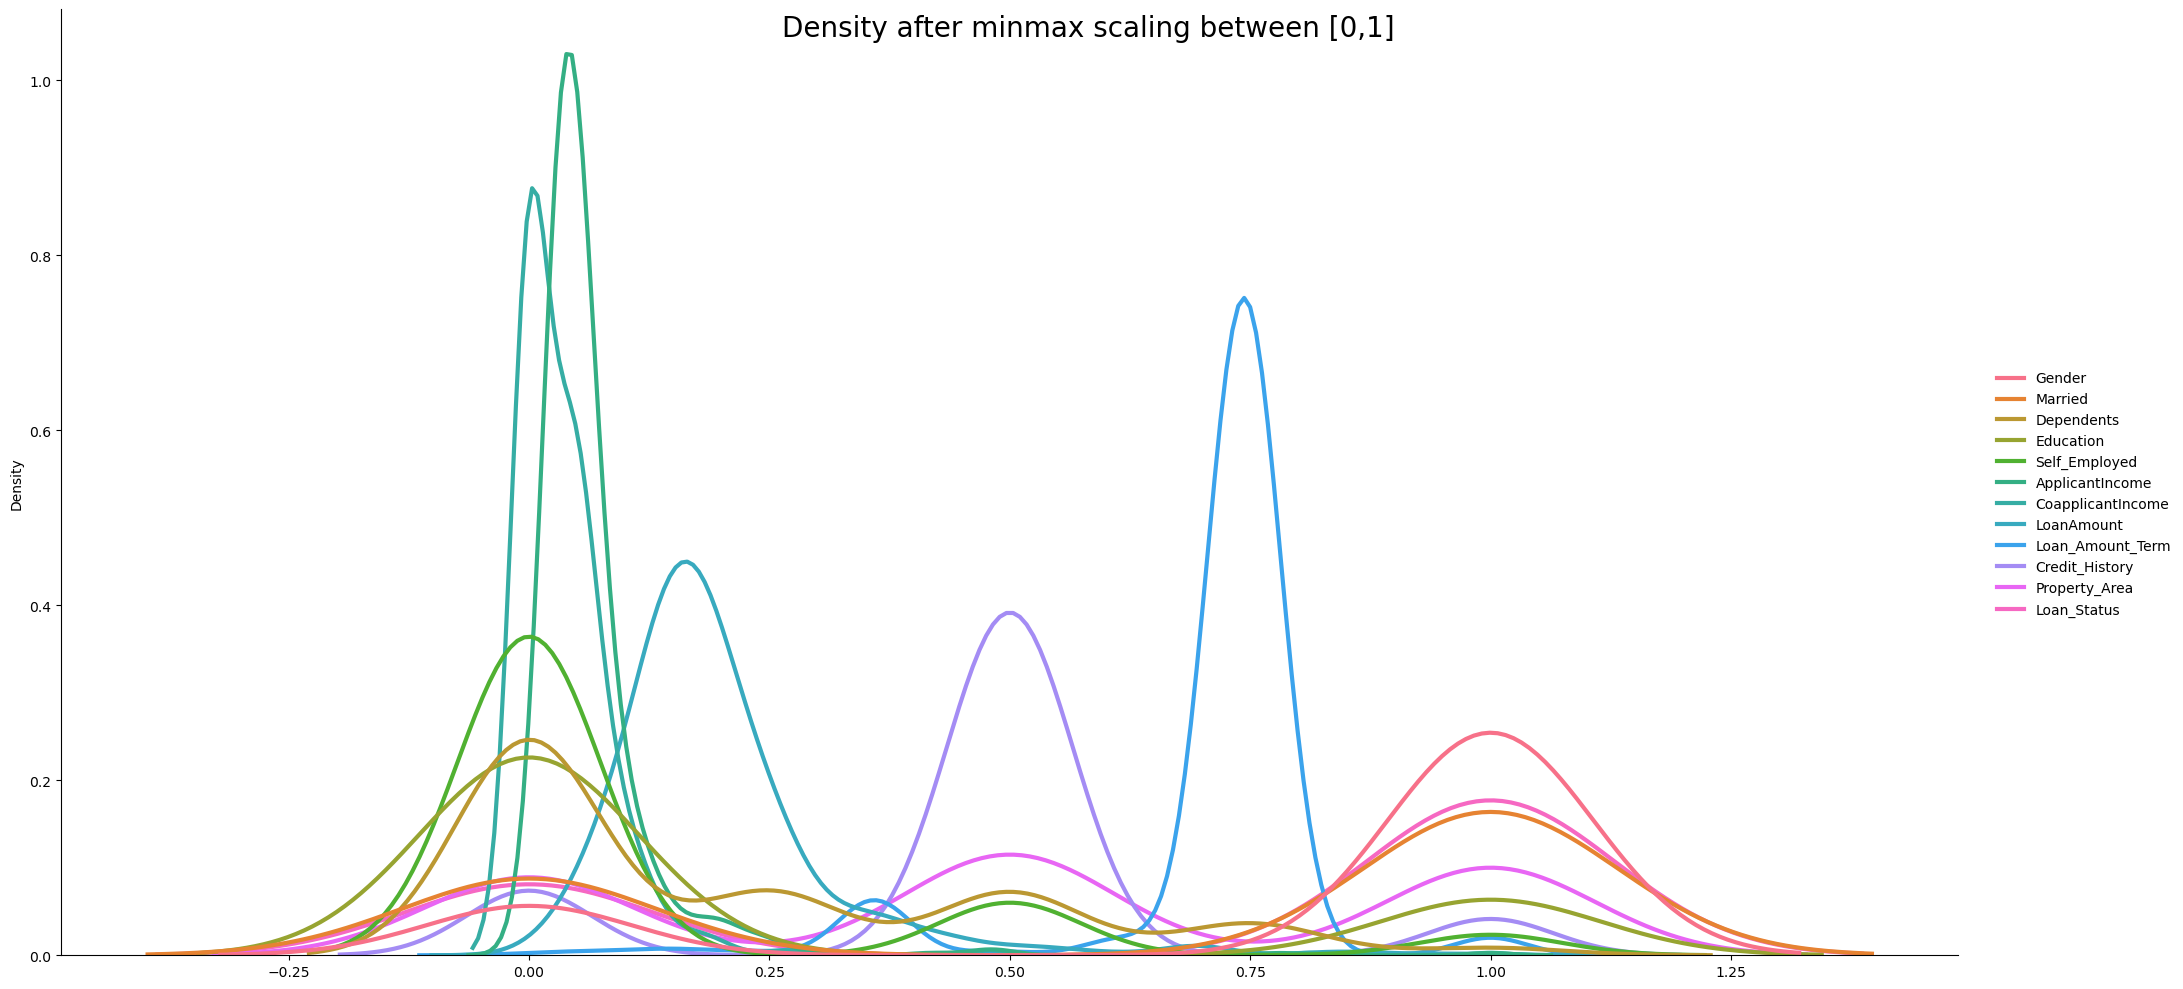

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.00,0.0,0.0,0.070489,0.000000,0.198860,0.743590,0.5,1.0,1.0
1,1.0,1.0,0.25,0.0,0.0,0.054830,0.036192,0.172214,0.743590,0.5,0.0,0.0
2,1.0,1.0,0.00,0.0,0.5,0.035250,0.000000,0.082489,0.743590,0.5,1.0,1.0
3,1.0,1.0,0.00,1.0,0.0,0.030093,0.056592,0.160637,0.743590,0.5,1.0,1.0
4,1.0,0.0,0.00,0.0,0.0,0.072356,0.000000,0.191027,0.743590,0.5,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.0,0.0,0.00,0.0,0.0,0.034014,0.000000,0.089725,0.743590,0.5,0.0,1.0
607,1.0,1.0,0.75,0.0,0.0,0.048930,0.000000,0.044863,0.358974,0.5,0.0,1.0
608,1.0,1.0,0.25,0.0,0.0,0.097984,0.005760,0.353111,0.743590,0.5,1.0,1.0
609,1.0,1.0,0.50,0.0,0.0,0.091936,0.000000,0.257598,0.743590,0.5,1.0,1.0


In [73]:
# Before implementing KNN, we also need to normalize our data. For simplicity, we will use MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
TrainData_knn = pd.DataFrame(scaler.fit_transform(TrainData_encoded), columns = TrainData_encoded.columns)
ax = sns.displot(TrainData_knn, kind = "kde",color = "#e64e4e", height=10, aspect=2,
            linewidth = 3 )
ax.fig.suptitle('Density after minmax scaling between [0,1]', size = 20)
plt.show(ax)

TrainData_knn

Step 3) KNNImputer

In [74]:
# Finally, KNNImputer
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
TrainData_knn = pd.DataFrame(imputer.fit_transform(TrainData_knn),columns = TrainData_knn.columns)

TrainData = TrainData_knn.copy()
TrainData.isna().sum() # 0 for all! Missing values are no more. Data cleaned.

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [75]:
# Third Approach: Flagging
# Some data is missing not at random (MNAR). This means that the data is probably missing due to the feature itself.
# One example would be loan amount. If it is too high, people might refuse to say.
# Some data is missing at random. This means that the data is probably missing because of another measured variable.
# An example would be self-employment. Those working in rural areas such as farms might be trivially self-employed. We might
# trivially replace all the missing values with "No".
# Observing the data, credit history is the variable with most missing values. This may be due to applicants not being able
# to prove their credit history.
# In this case, data is missing completely at random (MCAT).
# We mention this approach, even though it may not be applicable to our project, because it is important to remember
# that even missing values can provide valuable information, which we may get rid of by imputing.

In [76]:
# Filled in missing values (using second approach)

print("example record: ", TrainData.values[0]) #example of record with missing num values
print("example record: ", TrainData.values[23]) #example of record with missing cat values
TrainData

example record:  [1.         0.         0.         0.         0.         0.07048856
 0.         0.19885986 0.74358974 0.5        1.         1.        ]
example record:  [1.         1.         0.5        1.         0.         0.039765
 0.04600763 0.14905933 0.74358974 0.         0.         0.        ]


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.00,0.0,0.0,0.070489,0.000000,0.198860,0.743590,0.5,1.0,1.0
1,1.0,1.0,0.25,0.0,0.0,0.054830,0.036192,0.172214,0.743590,0.5,0.0,0.0
2,1.0,1.0,0.00,0.0,0.5,0.035250,0.000000,0.082489,0.743590,0.5,1.0,1.0
3,1.0,1.0,0.00,1.0,0.0,0.030093,0.056592,0.160637,0.743590,0.5,1.0,1.0
4,1.0,0.0,0.00,0.0,0.0,0.072356,0.000000,0.191027,0.743590,0.5,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.0,0.0,0.00,0.0,0.0,0.034014,0.000000,0.089725,0.743590,0.5,0.0,1.0
607,1.0,1.0,0.75,0.0,0.0,0.048930,0.000000,0.044863,0.358974,0.5,0.0,1.0
608,1.0,1.0,0.25,0.0,0.0,0.097984,0.005760,0.353111,0.743590,0.5,1.0,1.0
609,1.0,1.0,0.50,0.0,0.0,0.091936,0.000000,0.257598,0.743590,0.5,1.0,1.0


Step 4) Normalization Transform within range [0, 1]

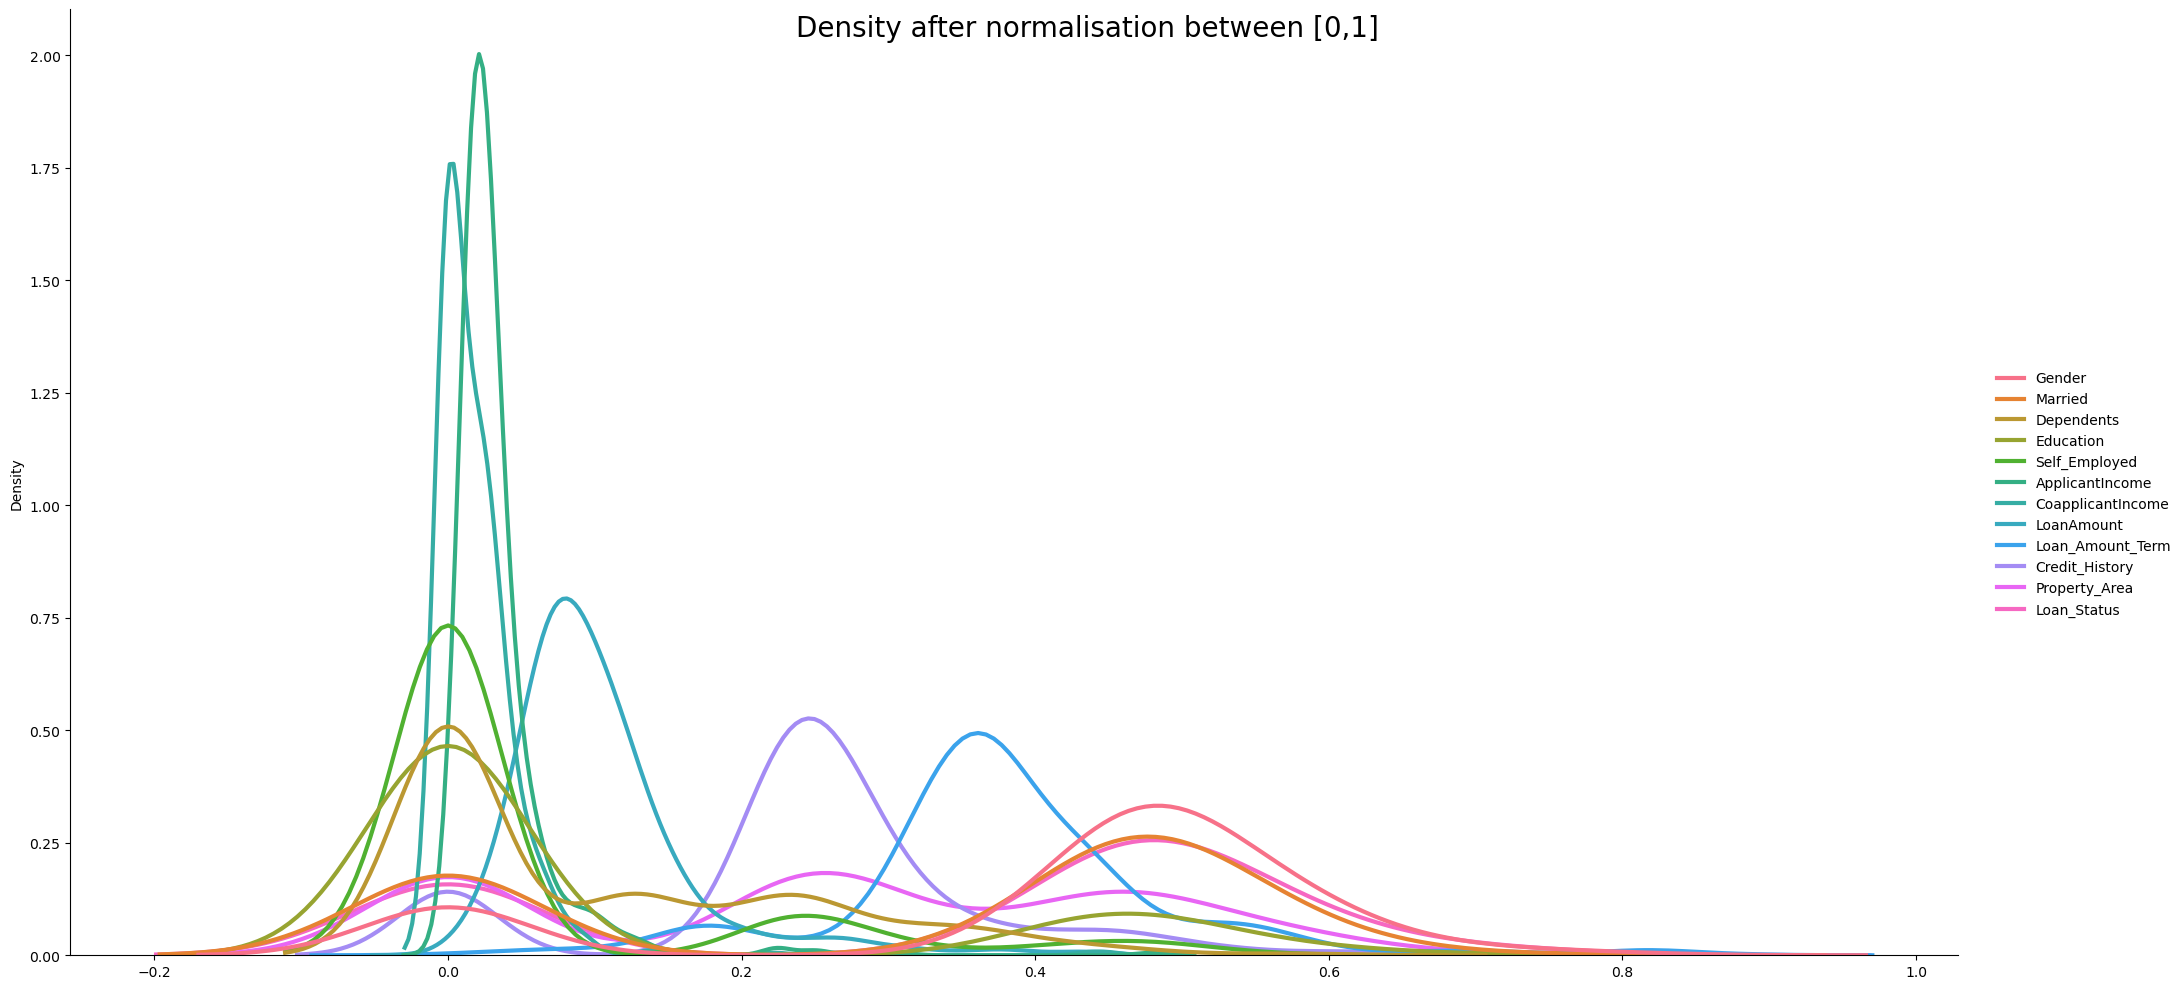

In [77]:
from sklearn.preprocessing import Normalizer
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

TrainDatacopy = TrainData.copy()
TrainDatacopy = pd.DataFrame(Normalizer().fit_transform(TrainData), columns = TrainData_knn.columns)
#print(TrainDatatransform)
#print(TrainDatacopy)

ax2 = sns.displot(TrainDatacopy, kind = "kde",color = "#e64e4e", height=10, aspect=2,
            linewidth = 3 )
ax2.fig.suptitle('Density after normalisation between [0,1]', size = 20)
plt.show(ax2)

Step 4) Normalization by Sqrt Transform (For comparison)

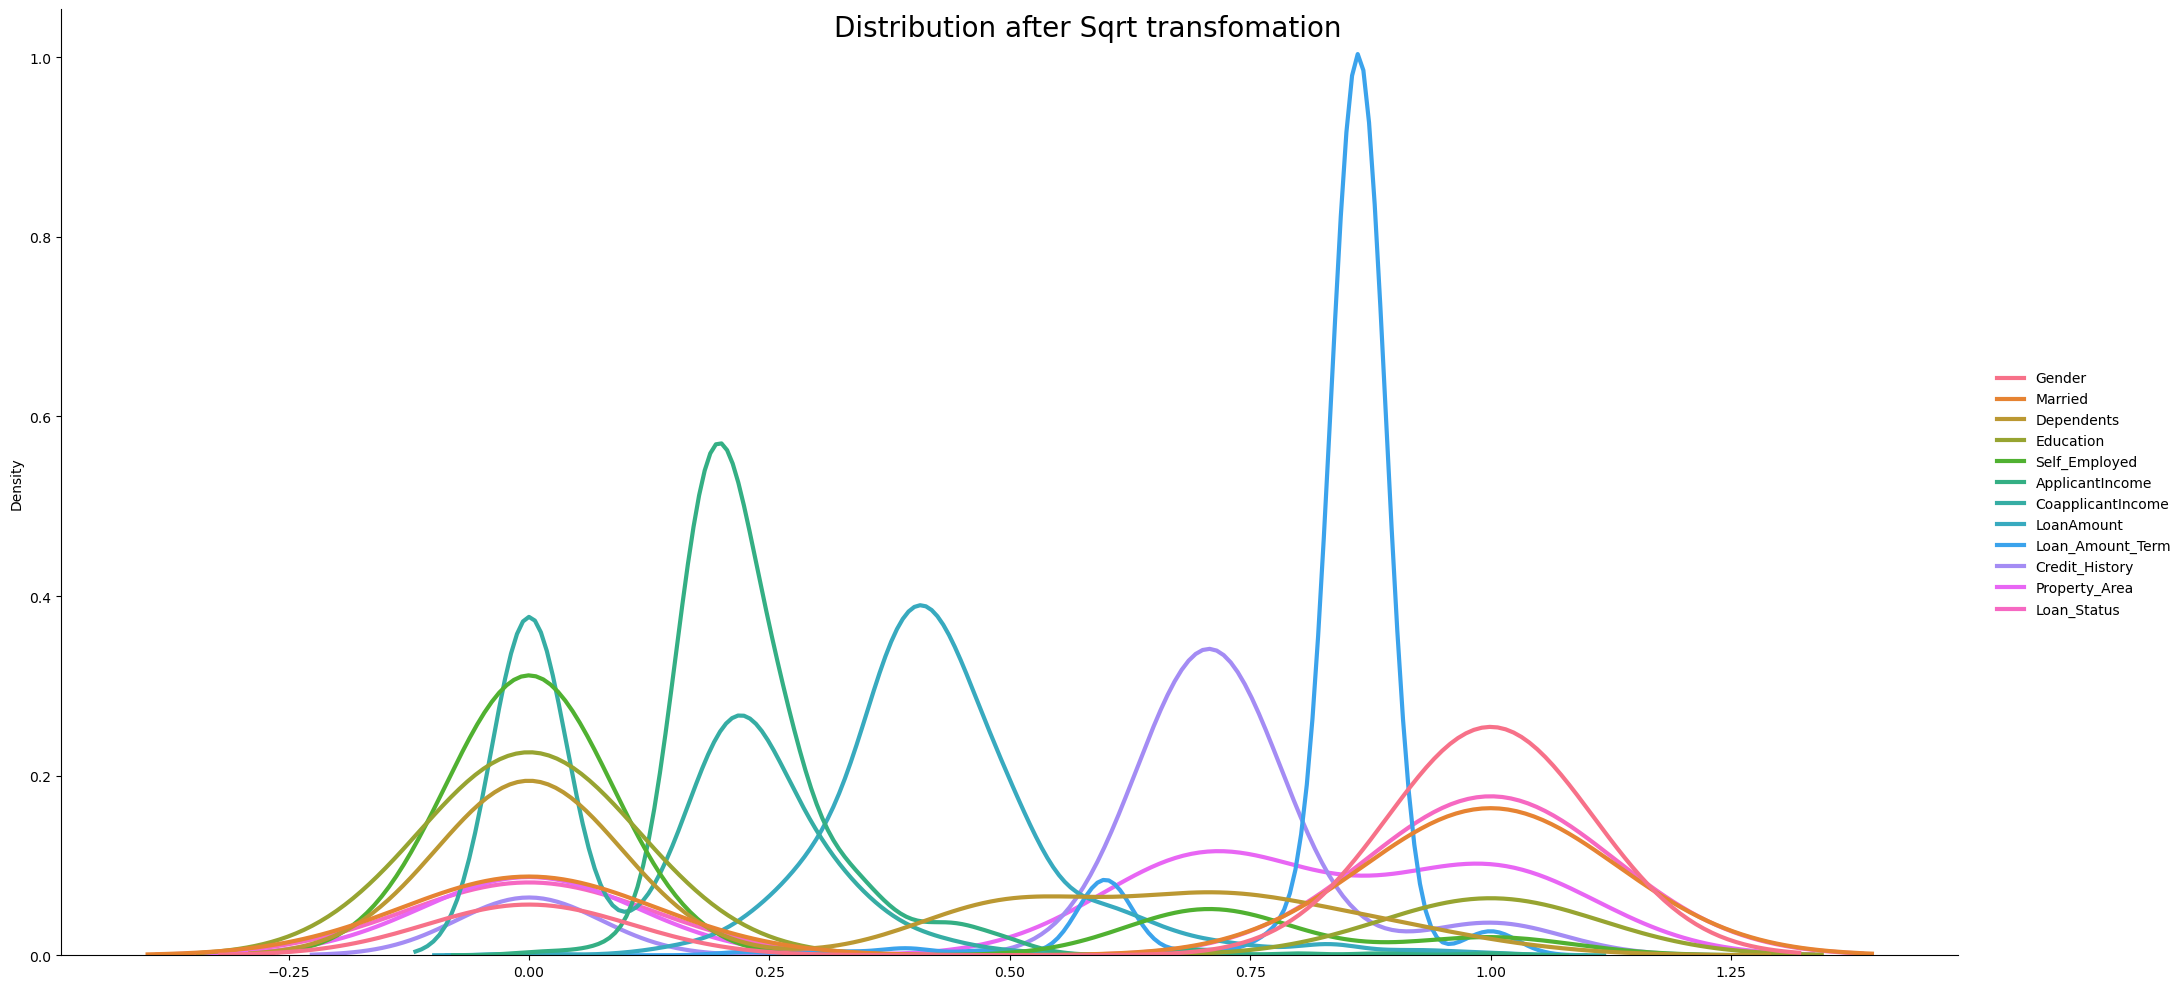

In [78]:
TrainDatacopy2 = TrainData.copy()
#TrainDataLogNorm = np.log(TrainDatacopy2)

#ax1 = sns.displot(TrainDataLogNorm, kind = "kde",color = "#e64e4e", height=10, aspect =2,
            #linewidth = 3, warn_singular=False )
#ax1.fig.suptitle('Distribution after Log transfomation', size = 20)
#plt.show(ax1)

#Some densities haven't been plotted since variance approaches or is equal to zero
#So to prepare for PCA dimensionality reduction, use squareroot transformation instead
TrainDatacopy3 = TrainData.copy()
TrainDataSqrtNorm = np.sqrt(TrainDatacopy3)

ax2 = sns.displot(TrainDataSqrtNorm, kind = "kde",color = "#e64e4e", height=10, aspect =2,
            linewidth = 3, warn_singular=False )
ax2.fig.suptitle('Distribution after Sqrt transfomation', size = 20)
plt.show(ax2)

### Outlier Detection

In [79]:
# One method is Extreme Value Analysis, using interquartile range or z-score. This can only find outliers for numerical columns.
# It is useful for univariate outliers. We can use it for the columns with the widest set of values. So, for example, do not use for
# Credit_History, since there are only two values.

  
TrainData_XV = TrainData.copy()
Q1=TrainData_XV.quantile(0.25, numeric_only=True)
Q3=TrainData_XV.quantile(0.75, numeric_only=True)
IQR=Q3-Q1
TrainData_XV = TrainData_XV[~((TrainData_XV<(Q1-1.5*IQR)) | (TrainData_XV>(Q3+1.5*IQR)))]
print(TrainData_XV.shape) # No values are detected as outliers
print(TrainData.shape)

(611, 12)
(611, 12)


In [80]:
# Another numerical approach is using standardized residuals from a multilinear regression model.
# Note: since we previously encoded our dataset, we can use this method.

from sklearn.linear_model import LinearRegression 

X= TrainData.iloc[:, :-1].values  
y= TrainData.iloc[:, -1].values 

reg = LinearRegression()
model = reg.fit(X, y)
print("regression coefficients: ", reg.coef_)
print("regression intercept: ", reg.intercept_)
print("model evaluation (r^2)", reg.score(X, y)) #R^2

predicted = model.predict(X)
residuals = list(np.subtract(y, predicted))
standardized_residuals = residuals / np.std(residuals) # |value| > 2 is outlier
# print("\n", y, "\n")
# print(predicted, "\n")
#print(standardized_residuals, "\n") # 13 outlier

TrainData_LR = TrainData.copy()
TrainData_LR['standardized_residuals'] = standardized_residuals



# removing outliers
TrainData_LR = TrainData_LR.drop(index=[row for row in TrainData_LR.index if 
                                        TrainData_LR.loc[row, 'standardized_residuals'] > 2
                                        or TrainData_LR.loc[row, 'standardized_residuals'] < -2])
# deleting last column
TrainData_LR = TrainData_LR.drop(columns=['standardized_residuals'])
TrainData_LR # 13 outlier

regression coefficients:  [ 0.0073269   0.08331848  0.01411611 -0.09564124 -0.0315685   0.14953474
 -0.55306251 -0.27710141 -0.05697047  0.84097998  0.01552637]
regression intercept:  0.35282793800250245
model evaluation (r^2) 0.2039823868059164


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.00,0.0,0.0,0.070489,0.000000,0.198860,0.743590,0.5,1.0,1.0
1,1.0,1.0,0.25,0.0,0.0,0.054830,0.036192,0.172214,0.743590,0.5,0.0,0.0
2,1.0,1.0,0.00,0.0,0.5,0.035250,0.000000,0.082489,0.743590,0.5,1.0,1.0
3,1.0,1.0,0.00,1.0,0.0,0.030093,0.056592,0.160637,0.743590,0.5,1.0,1.0
4,1.0,0.0,0.00,0.0,0.0,0.072356,0.000000,0.191027,0.743590,0.5,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.0,0.0,0.00,0.0,0.0,0.034014,0.000000,0.089725,0.743590,0.5,0.0,1.0
607,1.0,1.0,0.75,0.0,0.0,0.048930,0.000000,0.044863,0.358974,0.5,0.0,1.0
608,1.0,1.0,0.25,0.0,0.0,0.097984,0.005760,0.353111,0.743590,0.5,1.0,1.0
609,1.0,1.0,0.50,0.0,0.0,0.091936,0.000000,0.257598,0.743590,0.5,1.0,1.0


In [81]:
# corr matrix (for visualization)
TrainData_LR.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.369184,0.161026,0.042753,-0.048149,0.061329,0.091189,0.106906,-0.084371,-0.040138,-0.026095,0.036600
Married,0.369184,1.000000,0.312952,0.013287,-0.036118,0.052527,0.083804,0.146582,-0.103415,0.028072,0.004451,0.094848
Dependents,0.161026,0.312952,1.000000,0.059784,0.018532,0.104207,0.023701,0.136626,-0.080836,-0.098979,0.028621,-0.018808
Education,0.042753,0.013287,0.059784,1.000000,-0.015645,-0.140780,-0.064343,-0.168250,-0.074758,-0.045208,-0.061700,-0.084339
Self_Employed,-0.048149,-0.036118,0.018532,-0.015645,1.000000,0.101731,0.057151,0.081730,-0.042780,0.053130,-0.037798,0.043742
ApplicantIncome,0.061329,0.052527,0.104207,-0.140780,0.101731,1.000000,-0.112977,0.567568,-0.043818,-0.034381,-0.011971,-0.006977
CoapplicantIncome,0.091189,0.083804,0.023701,-0.064343,0.057151,-0.112977,1.000000,0.192724,-0.061471,0.077651,0.017300,-0.059347
LoanAmount,0.106906,0.146582,0.136626,-0.168250,0.081730,0.567568,0.192724,1.000000,0.035188,0.019267,-0.053162,-0.030980
Loan_Amount_Term,-0.084371,-0.103415,-0.080836,-0.074758,-0.042780,-0.043818,-0.061471,0.035188,1.000000,-0.022129,-0.077100,-0.016138
Credit_History,-0.040138,0.028072,-0.098979,-0.045208,0.053130,-0.034381,0.077651,0.019267,-0.022129,1.000000,0.027820,0.532699


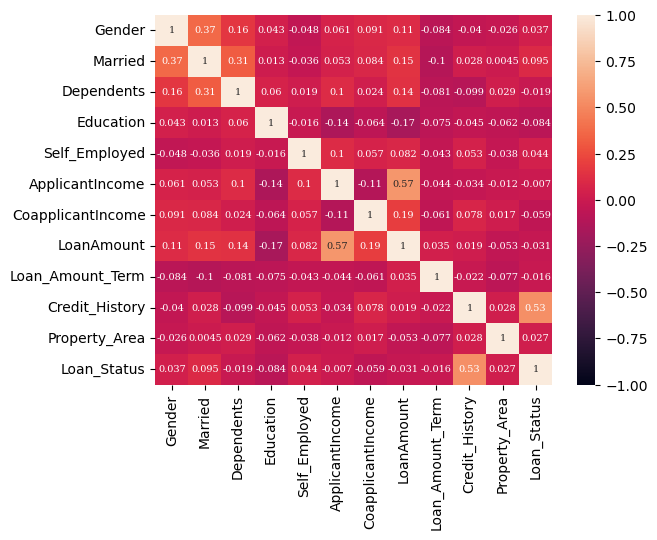

In [84]:
# heatmap

font = {'family': 'serif',
        #'color':  'darkred',
        'weight': 'normal',
        'size': 7,
        }

sns.heatmap(
    TrainData_LR.corr(),         
    annot=True, annot_kws=font,
    vmin=-1, vmax=1) # more lightly colored = more highly correlated
plt.show()

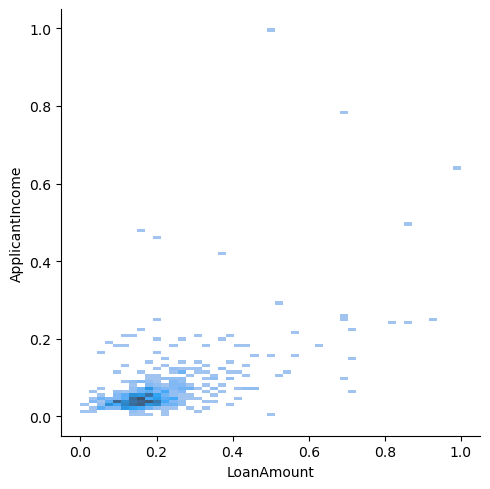

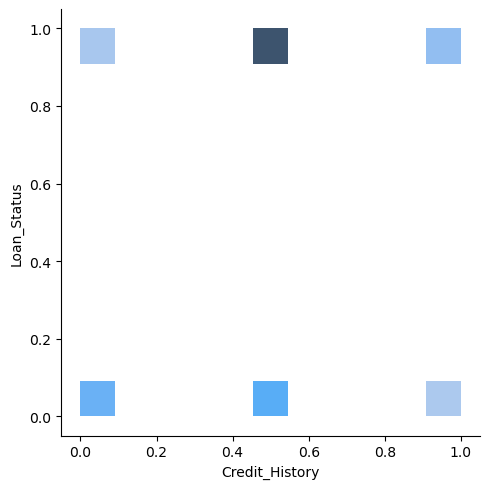

In [85]:
# Plotting LoanAmount, ApplicantIncome, Credit_History, and Loan_Status

#both numerical
sns.displot(
    data=TrainData_LR,
    #kind="kde", 
    x="LoanAmount", 
    y="ApplicantIncome", 
    #hue="Loan_Status",
    #col="Credit_History"
)
plt.show()
# both categorical
sns.displot(
    data=TrainData_LR,
    #kind="swarm", 
    x="Credit_History", 
    y="Loan_Status"
)
plt.show()

In [86]:
# An approach that can be used for both multivariate and univariate analysis is Isolation Forest. 
# This approach splits the data and isolates the samples in the form of a tree.
# The number of splittings required to isolate an outlier is lower than normal data.
# This is a type of unsupervised anomaly detection

from sklearn.ensemble import IsolationForest

model_IF = IsolationForest(contamination=float(0.05), random_state=42) 
# try with contamination = 0.001, 0.1, 0.5 to change the number of outliers we want to eliminate
model_IF.fit(TrainData)

TrainData_IF = TrainData_LR.copy()
input_features = TrainData_IF.columns
TrainData_IF['anomaly_scores'] = model_IF.decision_function(TrainData_IF[input_features]) # outlier score. -ve -> outlier
TrainData_IF['anomaly'] = model_IF.predict(TrainData_IF[input_features]) # outlier:-1  inlier:1

TrainData_IF # 27 outlier
#print(model_IF.decision_function(TrainData_IF[input_features]))
#print(model_IF.predict(TrainData_IF[input_features]))

E:\Downloads\ANACONDA3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,anomaly_scores,anomaly
0,1.0,0.0,0.00,0.0,0.0,0.070489,0.000000,0.198860,0.743590,0.5,1.0,1.0,0.159043,1
1,1.0,1.0,0.25,0.0,0.0,0.054830,0.036192,0.172214,0.743590,0.5,0.0,0.0,0.136300,1
2,1.0,1.0,0.00,0.0,0.5,0.035250,0.000000,0.082489,0.743590,0.5,1.0,1.0,0.131006,1
3,1.0,1.0,0.00,1.0,0.0,0.030093,0.056592,0.160637,0.743590,0.5,1.0,1.0,0.125402,1
4,1.0,0.0,0.00,0.0,0.0,0.072356,0.000000,0.191027,0.743590,0.5,1.0,1.0,0.159043,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.0,0.0,0.00,0.0,0.0,0.034014,0.000000,0.089725,0.743590,0.5,0.0,1.0,0.108766,1
607,1.0,1.0,0.75,0.0,0.0,0.048930,0.000000,0.044863,0.358974,0.5,0.0,1.0,0.074110,1
608,1.0,1.0,0.25,0.0,0.0,0.097984,0.005760,0.353111,0.743590,0.5,1.0,1.0,0.153038,1
609,1.0,1.0,0.50,0.0,0.0,0.091936,0.000000,0.257598,0.743590,0.5,1.0,1.0,0.159938,1


In [87]:
# Which method to use? Linear Regression.

#TrainData = TrainData_LR.copy()

### Handle Noisy Data

#### Binning By pd.cut

In [101]:
#Bin by Applicant Income, Coapplicant Income, LoanAmount, Loan_Status
print(TrainData['ApplicantIncome'].describe(), '\n')
#ApplicantIncomeCut = pd.cut(TrainData.iloc[:, 5], 4)
#print(ApplicantIncomeCut)
Bins = 10 #example number of bins
BinSize = (81000 - 150)/Bins
print(pd.cut(TrainData['ApplicantIncome'], Bins, precision = 0).value_counts(sort=False))

count    611.000000
mean       0.064929
std        0.075705
min        0.000000
25%        0.033711
50%        0.045145
75%        0.069759
max        1.000000
Name: ApplicantIncome, dtype: float64 

(-0.001, 0.1]    531
(0.1, 0.2]        58
(0.2, 0.3]        15
(0.3, 0.4]         0
(0.4, 0.5]         4
(0.5, 0.6]         0
(0.6, 0.7]         1
(0.7, 0.8]         1
(0.8, 0.9]         0
(0.9, 1.0]         1
Name: ApplicantIncome, dtype: int64


In [102]:
print(TrainData['CoapplicantIncome'].describe(), '\n')
print(pd.cut(TrainData['CoapplicantIncome'], Bins, precision = 0).value_counts(sort=False))

count    611.000000
mean       0.039071
std        0.070361
min        0.000000
25%        0.000000
50%        0.029112
75%        0.055296
max        1.000000
Name: CoapplicantIncome, dtype: float64 

(-0.001, 0.1]    558
(0.1, 0.2]        46
(0.2, 0.3]         3
(0.3, 0.4]         0
(0.4, 0.5]         2
(0.5, 0.6]         0
(0.6, 0.7]         0
(0.7, 0.8]         0
(0.8, 0.9]         1
(0.9, 1.0]         1
Name: CoapplicantIncome, dtype: int64


In [118]:
print(TrainData['LoanAmount'].describe(), '\n')
print(pd.cut(TrainData['LoanAmount'], Bins, precision = 0).value_counts(sort=False))

count    611.000000
mean       0.198800
std        0.121911
min        0.000000
25%        0.131693
50%        0.172214
75%        0.225760
max        1.000000
Name: LoanAmount, dtype: float64 

(-0.001, 0.1]     72
(0.1, 0.2]       331
(0.2, 0.3]       141
(0.3, 0.4]        33
(0.4, 0.5]        15
(0.5, 0.6]         6
(0.6, 0.7]         5
(0.7, 0.8]         3
(0.8, 0.9]         3
(0.9, 1.0]         2
Name: LoanAmount, dtype: int64


In [119]:
print(TrainData['Loan_Status'].describe(), '\n')
print(pd.cut(TrainData['Loan_Status'], Bins, precision = 0).value_counts(sort=False))

count    611.000000
mean       0.685761
std        0.464592
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Loan_Status, dtype: float64 

(-0.001, 0.1]    192
(0.1, 0.2]         0
(0.2, 0.3]         0
(0.3, 0.4]         0
(0.4, 0.5]         0
(0.5, 0.6]         0
(0.6, 0.7]         0
(0.7, 0.8]         0
(0.8, 0.9]         0
(0.9, 1.0]       419
Name: Loan_Status, dtype: int64


In [ ]:
# When categories are harder to define, we will use binning methods.

#TODO move this to after Binning and (maybe) change up the binned vars
# sns.scatterplot( data=TrainData,
#     x="CoapplicantIncome", y="LoanAmount", hue="Loan_Status" #col="Loan_Status  ", style="smoker", size="size",
# )

#### Binning By Feature Engine

In [121]:
import numpy.typing
from feature_engine.discretisation import EqualWidthDiscretiser
#Bin by Applicant Income, Coapplicant Income, Loan Amount, Loan_Status
ApplicantIncomeFE = EqualWidthDiscretiser(bins=10, return_object = True, return_boundaries = True)
#ApplicantIncomeFE.fit(TrainData)
#ApplicantIncomeFE.transform(TrainData)["ApplicantIncome_b"].value_counts()
#ApplicantIncomeFE = EqualWidthDiscretiser()
#print(ApplicantIncomeFE)
ApplicantIncomeFE.fit(TrainData)
ApplicantIncomeFE.transform(TrainData)["ApplicantIncome"].value_counts()

(-inf, 0.1]    531
(0.1, 0.2]      58
(0.2, 0.3]      15
(0.4, 0.5]       4
(0.6, 0.7]       1
(0.7, 0.8]       1
(0.9, inf]       1
Name: ApplicantIncome, dtype: int64

In [122]:
CoapplicantIncomeFE = EqualWidthDiscretiser(bins=10, return_object = True, return_boundaries = True)
CoapplicantIncomeFE.fit(TrainData)
CoapplicantIncomeFE.transform(TrainData)["CoapplicantIncome"].value_counts()

(-inf, 0.1]    558
(0.1, 0.2]      46
(0.2, 0.3]       3
(0.4, 0.5]       2
(0.8, 0.9]       1
(0.9, inf]       1
Name: CoapplicantIncome, dtype: int64

In [123]:
LoanAmountFE = EqualWidthDiscretiser(bins=10, return_object = True, return_boundaries = True)
LoanAmountFE.fit(TrainData)
LoanAmountFE.transform(TrainData)["LoanAmount"].value_counts()

(0.1, 0.2]     331
(0.2, 0.3]     141
(-inf, 0.1]     72
(0.3, 0.4]      33
(0.4, 0.5]      15
(0.5, 0.6]       6
(0.6, 0.7]       5
(0.8, 0.9]       3
(0.7, 0.8]       3
(0.9, inf]       2
Name: LoanAmount, dtype: int64

In [ ]:
# When categories are harder to define, we will use binning methods.

#TODO move this to after Binning and (maybe) change up the binned vars
# sns.scatterplot( data=TrainData,
#     x="CoapplicantIncome", y="LoanAmount", hue="Loan_Status" #col="Loan_Status  ", style="smoker", size="size",
# )

#### Binning By KBinsDiscretizer Example

In [103]:
from sklearn.preprocessing import KBinsDiscretizer

In [104]:
#Default bins
TrainDataAmounts = TrainData[NumericData]
print(TrainDataAmounts)
TrainDataEqual = KBinsDiscretizer(n_bins = 10, strategy = 'uniform', encode = 'ordinal')
n = TrainDataEqual.fit(TrainDataAmounts)
print(n.bin_edges_)

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           0.070489           0.000000    0.198860          0.743590   
1           0.054830           0.036192    0.172214          0.743590   
2           0.035250           0.000000    0.082489          0.743590   
3           0.030093           0.056592    0.160637          0.743590   
4           0.072356           0.000000    0.191027          0.743590   
..               ...                ...         ...               ...   
606         0.034014           0.000000    0.089725          0.743590   
607         0.048930           0.000000    0.044863          0.358974   
608         0.097984           0.005760    0.353111          0.743590   
609         0.091936           0.000000    0.257598          0.743590   
610         0.054830           0.000000    0.179450          0.743590   

     Credit_History  
0               0.5  
1               0.5  
2               0.5  
3               0.5  
4            

In [117]:
#Default bins #Number of bins has been decresed
TrainDataAmounts = TrainData[NumericData]
print(TrainDataAmounts)
TrainDataEqual = KBinsDiscretizer(n_bins = 2, strategy = 'quantile', encode = 'ordinal')
n = TrainDataEqual.fit(TrainDataAmounts)
print(n.bin_edges_)

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           0.070489           0.000000    0.198860          0.743590   
1           0.054830           0.036192    0.172214          0.743590   
2           0.035250           0.000000    0.082489          0.743590   
3           0.030093           0.056592    0.160637          0.743590   
4           0.072356           0.000000    0.191027          0.743590   
..               ...                ...         ...               ...   
606         0.034014           0.000000    0.089725          0.743590   
607         0.048930           0.000000    0.044863          0.358974   
608         0.097984           0.005760    0.353111          0.743590   
609         0.091936           0.000000    0.257598          0.743590   
610         0.054830           0.000000    0.179450          0.743590   

     Credit_History  
0               0.5  
1               0.5  
2               0.5  
3               0.5  
4            

In [106]:
# When categories are harder to define, we will use binning methods.

#TODO move this to after Binning and (maybe) change up the binned vars
# sns.scatterplot( data=TrainData,
#     x="CoapplicantIncome", y="LoanAmount", hue="Loan_Status" #col="Loan_Status  ", style="smoker", size="size",
# )

### Data Discretization

In [107]:
# Remove irrelevant data
TrainData.corr()
# TODO move this to after discretization, and check it with loan_status. if weakly correlated with loan_status, you can remove the feature
# TODO we can carry out dimensionality reduction

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_Bin
Gender,1.000000,0.367926,0.161049,0.044560,-0.035492,0.061997,0.082028,0.108139,-0.082177,-0.009745,-0.026958,0.019381,0.040288
Married,0.367926,1.000000,0.312316,0.014223,-0.032739,0.051332,0.077770,0.146981,-0.102624,0.032002,0.002918,0.089280,0.046954
Dependents,0.161049,0.312316,1.000000,0.069195,0.012029,0.103693,0.018000,0.131945,-0.081007,-0.093677,0.027978,-0.017014,0.081675
Education,0.044560,0.014223,0.069195,1.000000,-0.022310,-0.140590,-0.063585,-0.166859,-0.073701,-0.037211,-0.064391,-0.084286,-0.128764
Self_Employed,-0.035492,-0.032739,0.012029,-0.022310,1.000000,0.096050,0.051249,0.090072,-0.035992,0.092614,-0.012639,0.012374,0.083768
ApplicantIncome,0.061997,0.051332,0.103693,-0.140590,0.096050,1.000000,-0.116266,0.566037,-0.044361,-0.034103,-0.008948,-0.005154,0.961149
CoapplicantIncome,0.082028,0.077770,0.018000,-0.063585,0.051249,-0.116266,1.000000,0.188147,-0.059135,0.069159,0.011051,-0.057733,-0.078694
LoanAmount,0.108139,0.146981,0.131945,-0.166859,0.090072,0.566037,0.188147,1.000000,0.036135,0.028435,-0.045145,-0.036789,0.535611
Loan_Amount_Term,-0.082177,-0.102624,-0.081007,-0.073701,-0.035992,-0.044361,-0.059135,0.036135,1.000000,-0.009356,-0.077171,-0.023619,-0.037700
Credit_History,-0.009745,0.032002,-0.093677,-0.037211,0.092614,-0.034103,0.069159,0.028435,-0.009356,1.000000,0.019358,0.423258,-0.037953


### Data Normalization

#### Using Z-score

In [108]:
# Analyze their impact, then decide whether to remove the outliers
# We can also use regression to get standardized_residuals and analyze the outliers

### Correlations Visualization

In [109]:
corr_matrix = TrainData.corr()
print(corr_matrix)

                       Gender   Married  Dependents  Education  Self_Employed  \
Gender               1.000000  0.367926    0.161049   0.044560      -0.035492   
Married              0.367926  1.000000    0.312316   0.014223      -0.032739   
Dependents           0.161049  0.312316    1.000000   0.069195       0.012029   
Education            0.044560  0.014223    0.069195   1.000000      -0.022310   
Self_Employed       -0.035492 -0.032739    0.012029  -0.022310       1.000000   
ApplicantIncome      0.061997  0.051332    0.103693  -0.140590       0.096050   
CoapplicantIncome    0.082028  0.077770    0.018000  -0.063585       0.051249   
LoanAmount           0.108139  0.146981    0.131945  -0.166859       0.090072   
Loan_Amount_Term    -0.082177 -0.102624   -0.081007  -0.073701      -0.035992   
Credit_History      -0.009745  0.032002   -0.093677  -0.037211       0.092614   
Property_Area       -0.026958  0.002918    0.027978  -0.064391      -0.012639   
Loan_Status          0.01938

In [110]:
#the following is the visualization of the correlation matrix which shows the strength of the relation between each 2 variables
# you will find that we did not visualize the variable with itself because it will always be (1)

# Dimensionality Reduction with PCA

In [111]:
#Calculate variance of each normalised feature, by square root
#Last Column is the target
import statistics

variances = TrainDatacopy3.var()
print(variances, '\n')
featurenames = list(TrainDatacopy3.iloc[:, :-1])
#print(featurenames)
targets = TrainDatacopy3['Loan_Status']
#print(targets)
#New dataframe containing only 3 columns with highest variances as principal features, delta degrees of freedom = 1

Gender               0.148909
Married              0.227453
Dependents           0.075780
Education            0.171495
Self_Employed        0.071768
ApplicantIncome      0.005731
CoapplicantIncome    0.004951
LoanAmount           0.014862
Loan_Amount_Term     0.018823
Credit_History       0.055947
Property_Area        0.155413
Loan_Status          0.215846
dtype: float64 



In [114]:
#PCA can be trained by various methods, two are discussed here: Logistic Regression and Random Forest
#Logistic Regression:predicts binary output
#Uses 1/ 1 + exp(-(bo + b1*x))
#Random Forest:uses multiple decision trees and combines their output to get a decision
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#Use all expect decision column, aka last column
X = TrainDataSqrtNorm.iloc[:,:-1]      
Y = TrainDataSqrtNorm.iloc[:,-1]
random_state = 42 #shuffling of executions of splitting, best 42
Xtrain, Xtest, Ytrain, Ytest = \
                    train_test_split(X, Y,
                     test_size = 0.2, #Test size: 80% training, 20% testing
                     shuffle = True,
                     random_state = random_state)
pca = PCA()
Xtrain = pca.fit_transform(Xtrain)
Xtest = pca.transform(Xtest)
explainedvariance = pca.explained_variance_ratio_
print("Variance: ",explainedvariance)

LogisticR = LogisticRegression(max_iter = 5000)
LogisticR.fit(Xtrain, Ytrain)
#Get score after (forward) iterations
print("Logistic Regression Score:", LogisticR.score(Xtest,Ytest))

Variance:  [0.27707445 0.17090909 0.15582656 0.10538383 0.09456653 0.08401752
 0.06648105 0.01954297 0.01485098 0.00864832 0.00269869]
Logistic Regression Score: 0.8292682926829268


In [115]:
#Use same splitting in the Random Forest algorithm
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth = 5, random_state = 0)
classifier.fit(Xtrain, Ytrain)

Ypredict = classifier.predict(Xtest)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

Lossmatrix = confusion_matrix(Ytest, Ypredict)
print("Error matrix:", Lossmatrix)
print("Random Forest Score:", accuracy_score(Ytest, Ypredict))

Error matrix: [[17 18]
 [ 3 85]]
Random Forest Score: 0.8292682926829268


## Regression: Phase 2